<a href="https://colab.research.google.com/github/LokeshVadlamudi/DeepLearningClass/blob/master/kerasLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/heart.csv')

In [106]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**we have multiple columns that doesnt make sense for prediction**

In [107]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
import seaborn as sns

In [0]:
corr = df.corr()

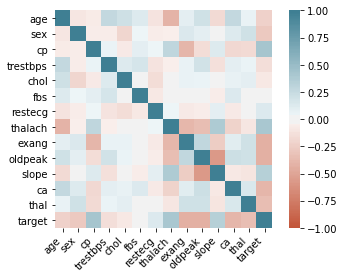

In [110]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [111]:
df.shape

(303, 14)

In [112]:
input = df.drop(['target'],axis=1)
input

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [0]:
output = df[['target']]

In [114]:
output

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [115]:
df.target.unique()

array([1, 0])

In [0]:
input = input.values

In [117]:
input

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [0]:
output = output.values

In [119]:
output

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [0]:
from sklearn.preprocessing import StandardScaler
s_input = StandardScaler()
input = s_input.fit_transform(input)

In [121]:
input

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [122]:
output

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,output,test_size=.2,random_state=0)

In [124]:
X_train

array([[-1.25357993, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [ 1.28306308, -1.46841752,  1.00257707, ..., -0.64911323,
         0.26508221, -0.51292188],
       [ 0.40075247,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 0.18017482,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [-0.81242462,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.40075247,  0.68100522,  0.03203122, ..., -0.64911323,
        -0.71442887, -0.51292188]])

keras model creation


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.optimizers import Adam,sgd
from sklearn.metrics import mean_absolute_error
from keras import layers, metrics
import keras

In [126]:
!pip3 install 'gast==0.2.2'
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [0]:
def runAlgo(X_train,X_test,y_train,y_test):
    logi = Sequential()
    logi.add(Dense(303, activation="relu",input_shape=(13,)))
    logi.add(Dropout(0.3))
    logi.add(Dense(9, activation="relu"))
    logi.add(Dropout(0.1))
    logi.add(Dense(3, activation="relu"))
    logi.add(Dense(1,activation='sigmoid'))
    logi.compile(loss='binary_crossentropy', optimizer=sgd(), metrics=['accuracy'])
    logi.fit(X_train, y_train, epochs=100)
    a = logi.evaluate(X_test, y_test)
    return a

In [144]:
runAlgo(X_train,X_test,y_train,y_test)

Epoch 1/100
242/242 [==============================] - 0s 457us/step - loss: 0.7049 - accuracy: 0.4628
Epoch 2/100
242/242 [==============================] - 0s 57us/step - loss: 0.6984 - accuracy: 0.4669
Epoch 3/100
242/242 [==============================] - 0s 57us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 4/100
242/242 [==============================] - 0s 57us/step - loss: 0.6864 - accuracy: 0.5537
Epoch 5/100
242/242 [==============================] - 0s 58us/step - loss: 0.6860 - accuracy: 0.5331
Epoch 6/100
242/242 [==============================] - 0s 59us/step - loss: 0.6829 - accuracy: 0.5702
Epoch 7/100
242/242 [==============================] - 0s 60us/step - loss: 0.6799 - accuracy: 0.5661
Epoch 8/100
242/242 [==============================] - 0s 60us/step - loss: 0.6758 - accuracy: 0.6157
Epoch 9/100
242/242 [==============================] - 0s 59us/step - loss: 0.6721 - accuracy: 0.6612
Epoch 10/100
242/242 [==============================] - 0s 58us/step - loss: 0.67

[0.346399899388923, 0.8524590134620667]